# I. Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
sns.set(style = 'white')
import os

# II. Importing the datasets (test and train)

In [2]:
train=pd.read_csv(r"/Users/igara/OneDrive/Bureau/auto-insurance-fall-2017/train_auto.csv")
test=pd.read_csv(r"/Users/igara/OneDrive/Bureau/auto-insurance-fall-2017/test_auto.csv")

# III. Train and test datasets exploration

In [3]:
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [4]:
test.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [5]:
train.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [6]:
test.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

###### The train dataset has 26 columns. 

In [7]:
train.describe()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,5151.867663,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,33.485725,5.351305,0.798554,1.695503,8.328323
std,2978.893962,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,15.908333,4.146635,1.158453,2.147112,5.700742
min,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000
25%,2559.000000,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000
50%,5133.000000,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000
75%,7745.000000,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,107586.136160,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000


In [8]:
train.dtypes

INDEX            int64
TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME          object
PARENT1         object
HOME_VAL        object
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK        object
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM        object
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object

## 1. Formatting the variables

In [9]:
# converting the variables INCOME, HOME_VAL, BLUEBOOK, OLDCLAIM to a float variable in the test and train databases 
#(dropping the "$")

#INCOME
train['INCOME']=train['INCOME'].replace('\$','',regex=True)
train['INCOME']=train['INCOME'].replace('\,','.',regex=True).astype(float)
#HOME_VAL
train['HOME_VAL']=train['HOME_VAL'].replace('\$','',regex=True)
train['HOME_VAL']=train['HOME_VAL'].replace('\,','.',regex=True).astype(float)
#BLUEBOOK
train['BLUEBOOK']=train['BLUEBOOK'].replace('\$','',regex=True)
train['BLUEBOOK']=train['BLUEBOOK'].replace('\,','.',regex=True).astype(float)
#OLDCLAIM
train['OLDCLAIM']=train['OLDCLAIM'].replace('\$','',regex=True)
train['OLDCLAIM']=train['OLDCLAIM'].replace('\,','.',regex=True).astype(float)



#INCOME
test['INCOME']=test['INCOME'].replace('\$','',regex=True)
test['INCOME']=test['INCOME'].replace('\,','.',regex=True).astype(float)
#HOME_VAL
test['HOME_VAL']=test['HOME_VAL'].replace('\$','',regex=True)
test['HOME_VAL']=test['HOME_VAL'].replace('\,','.',regex=True).astype(float)
#BLUEBOOK
test['BLUEBOOK']=test['BLUEBOOK'].replace('\$','',regex=True)
test['BLUEBOOK']=test['BLUEBOOK'].replace('\,','.',regex=True).astype(float)
#OLDCLAIM
test['OLDCLAIM']=test['OLDCLAIM'].replace('\$','',regex=True)
test['OLDCLAIM']=test['OLDCLAIM'].replace('\,','.',regex=True).astype(float)



In [10]:
#converting the variables PARENT1 / REVOKED / RED_CAR to a numeric in the train and test databases
train['RED_CAR']= train['RED_CAR'].replace(['yes','no'],[1,0])
train['PARENT1']= train['PARENT1'].replace(['Yes','No'],[1,0])
train['REVOKED']= train['REVOKED'].replace(['Yes','No'],[1,0])

test['RED_CAR']= test['RED_CAR'].replace(['yes','no'],[1,0])
test['PARENT1']= test['PARENT1'].replace(['Yes','No'],[1,0])
test['REVOKED']= test['REVOKED'].replace(['Yes','No'],[1,0])


In [11]:
# formatting the variables MSTATUS, SEX, EDUCATION, JOB,  CARTYPE ( remove the z_)


#MSTATUS
train['MSTATUS']=train['MSTATUS'].replace('z_','',regex=True)
#SEX
train['SEX']=train['SEX'].replace('z_','',regex=True)
#EDUCATION
train['EDUCATION']=train['EDUCATION'].replace('z_','',regex=True)
#JOB
train['JOB']=train['JOB'].replace('z_','',regex=True)
#CARTYPE
train['CAR_TYPE']=train['CAR_TYPE'].replace('z_','',regex=True)
#URBANICITY
train['URBANICITY']=train['URBANICITY'].replace('z_','',regex=True)


#MSTATUS
test['MSTATUS']=test['MSTATUS'].replace('z_','',regex=True)
#SEX
test['SEX']=test['SEX'].replace('z_','',regex=True)
#EDUCATION
test['EDUCATION']=test['EDUCATION'].replace('z_','',regex=True)
#JOB
test['JOB']=test['JOB'].replace('z_','',regex=True)
#CARTYPE
test['CAR_TYPE']=test['CAR_TYPE'].replace('z_','',regex=True)
#URBANICITY
test['URBANICITY']=test['URBANICITY'].replace('z_','',regex=True)



In [12]:
#converting MSTATUS to a numeric variable (1=Yes and 0=No)
#converting SEX to a numeric variable (1=Male and 2=Female)

train['MSTATUS']= train['MSTATUS'].replace(['Yes','No'],[1,0])
train['SEX']= train['SEX'].replace(['M','F'],[1,2])

test['MSTATUS']= test['MSTATUS'].replace(['Yes','No'],[1,0])
test['SEX']= test['SEX'].replace(['M','F'],[1,2])

Now we will explore the modalities of the categorical variables

In [13]:
train["EDUCATION"].unique()

array(['PhD', 'High School', '<High School', 'Bachelors', 'Masters'],
      dtype=object)

In [14]:
train["JOB"].unique()

array(['Professional', 'Blue Collar', 'Clerical', 'Doctor', 'Lawyer',
       'Manager', nan, 'Home Maker', 'Student'], dtype=object)

In [15]:
train["URBANICITY"].unique()

array(['Highly Urban/ Urban', 'Highly Rural/ Rural'], dtype=object)

In [16]:
train["CAR_TYPE"].unique()

array(['Minivan', 'SUV', 'Sports Car', 'Van', 'Panel Truck', 'Pickup'],
      dtype=object)

In [17]:
train['TARGET_FLAG'].describe()

count    8161.000000
mean        0.263816
std         0.440728
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: TARGET_FLAG, dtype: float64

## 2. Missing values

##### Train dataset

In [18]:
train.isnull().sum()

INDEX            0
TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

 YOJ contains 454 missing values
 
 INCOME contains 445 missing values
 
 JOB contains 526 missing values
 
 CAR_AGE contains 510 missing values
 
 =>Missing values in numerical columns will be replaced with the mean of the column

In [19]:
# replacing YOJ missing values with the mean of the column

avg_YOJ = train["YOJ"].astype("float").mean(axis=0)
train["YOJ"].replace(np.nan, avg_YOJ, inplace=True)

# replacing INCOME missing values with the mean of the column

avg_INCOME = train["INCOME"].astype("float").mean(axis=0)
train["INCOME"].replace(np.nan, avg_INCOME, inplace=True)

# replacing HOME_VAL missing values with the mean of the column

avg_HOME_VAL = train["HOME_VAL"].astype("float").mean(axis=0)
train["HOME_VAL"].replace(np.nan, avg_HOME_VAL, inplace=True)

# replacing CAR_AGE missing values with the mean of the column

avg_CAR_AGE = train["CAR_AGE"].astype("float").mean(axis=0)
train["CAR_AGE"].replace(np.nan, avg_CAR_AGE, inplace=True)


# replacing AGE missing values with the mean of the column

avg_AGE = train["AGE"].astype("float").mean(axis=0)
train["AGE"].replace(np.nan, avg_AGE, inplace=True)



In [20]:
train.isnull().sum()

INDEX            0
TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              0
HOMEKIDS         0
YOJ              0
INCOME           0
PARENT1          0
HOME_VAL         0
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE          0
URBANICITY       0
dtype: int64

JOB column still have missing values. It is a categorical variable. It will be treated lately in the code.

###### Test dataset

In [21]:
test.isnull().sum()

INDEX             0
TARGET_FLAG    2141
TARGET_AMT     2141
KIDSDRIV          0
AGE               1
HOMEKIDS          0
YOJ              94
INCOME          125
PARENT1           0
HOME_VAL        111
MSTATUS           0
SEX               0
EDUCATION         0
JOB             139
TRAVTIME          0
CAR_USE           0
BLUEBOOK          0
TIF               0
CAR_TYPE          0
RED_CAR           0
OLDCLAIM          0
CLM_FREQ          0
REVOKED           0
MVR_PTS           0
CAR_AGE         129
URBANICITY        0
dtype: int64

Missing values will be replaced with the mean of the numerical column.

In [22]:
# replacing YOJ missing values with the mean of the column

avg_YOJ = test["YOJ"].astype("float").mean(axis=0)
test["YOJ"].replace(np.nan, avg_YOJ, inplace=True)

# replacing INCOME missing values with the mean of the column

avg_INCOME = test["INCOME"].astype("float").mean(axis=0)
test["INCOME"].replace(np.nan, avg_INCOME, inplace=True)

# replacing HOME_VAL missing values with the mean of the column

avg_HOME_VAL = test["HOME_VAL"].astype("float").mean(axis=0)
test["HOME_VAL"].replace(np.nan, avg_HOME_VAL, inplace=True)

# replacing CAR_AGE missing values with the mean of the column

avg_CAR_AGE = test["CAR_AGE"].astype("float").mean(axis=0)
test["CAR_AGE"].replace(np.nan, avg_CAR_AGE, inplace=True)



# replacing AGE missing values with the mean of the column

avg_AGE = test["AGE"].astype("float").mean(axis=0)
test["AGE"].replace(np.nan, avg_AGE, inplace=True)



In [23]:
test.isnull().sum()

INDEX             0
TARGET_FLAG    2141
TARGET_AMT     2141
KIDSDRIV          0
AGE               0
HOMEKIDS          0
YOJ               0
INCOME            0
PARENT1           0
HOME_VAL          0
MSTATUS           0
SEX               0
EDUCATION         0
JOB             139
TRAVTIME          0
CAR_USE           0
BLUEBOOK          0
TIF               0
CAR_TYPE          0
RED_CAR           0
OLDCLAIM          0
CLM_FREQ          0
REVOKED           0
MVR_PTS           0
CAR_AGE           0
URBANICITY        0
dtype: int64

 => We still have missing vallues in the JOB column when dealing with categorical variables

Our target variable is TARGET_FLAG : 

The test instructions did not contain a detailed description of the database. In my opinion,TARGET_FLAG indicates whether the policyholder has a claim or not. It is a binary variable. The TARGET_AMT variable indicates the amount of the corresponding claim. Here, we are only interested in the TARGET_FLAG variable. We will try to predict whether the insurer will have a claim or not.

We can delete the column TARGET_AMT from our dataset



In [24]:
df_train=train.drop(columns='TARGET_AMT')

## 3. The target variable

In [25]:
df_train["TARGET_FLAG"].value_counts()

0    6008
1    2153
Name: TARGET_FLAG, dtype: int64

In [26]:
df_train.shape

(8161, 25)

In [27]:
count_no_claim = len(df_train[df_train["TARGET_FLAG"]==0])
count_claim = len(df_train[df_train["TARGET_FLAG"]==1])
pct_of_no_claim = count_no_claim/(count_no_claim+count_claim)
print("percentage of no ploicyholders with a claim", pct_of_no_claim*100)
pct_of_claim = count_claim/(count_no_claim+count_claim)
print("percentage of policyholders without a claim", pct_of_claim*100)

percentage of no ploicyholders with a claim 73.61842911407915
percentage of policyholders without a claim 26.38157088592084


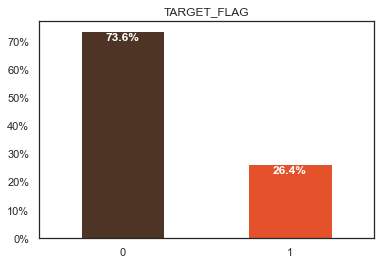

In [28]:
#TARGET_FLAG
colors = ['#4D3425','#E4512B']
ax = (df_train['TARGET_FLAG'].value_counts()*100.0 /len(train)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


ax.set_title('TARGET_FLAG')
totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

In our dataset 73.5% of policyholders don't have any claim and only 26.5% of them have a claim

### Correlation between the target variable and the explicative variables

<AxesSubplot:>

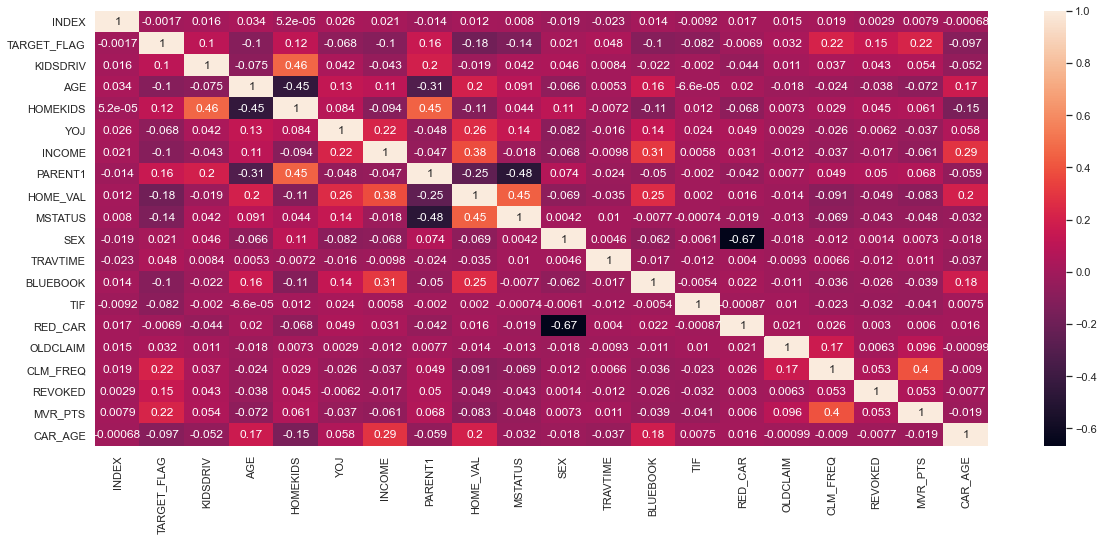

In [29]:
c=df_train.corr()
plt.figure(figsize=(20,8))
sns.heatmap(c,annot=True)

<AxesSubplot:>

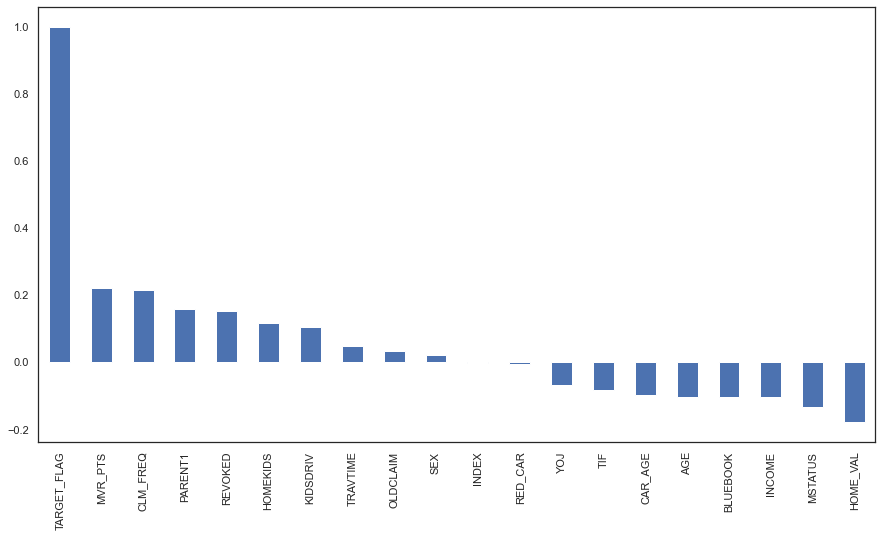

In [30]:
#Histogram of Correlation of TARGET_FLAG with other variables:
plt.figure(figsize=(15,8))
df_train.corr()['TARGET_FLAG'].sort_values(ascending = False).plot(kind='bar')

The variables most correlated with the targer variable are :  MVR_PTS, CLM_FREQ, PARENT1, REVOKED


We will study now the relationship between our target  variable the categorical explicative variables

Text(0, 0.5, 'TARGET_FLAG')

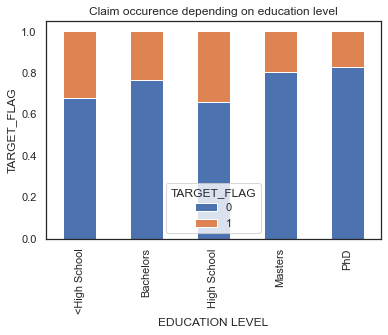

In [31]:
table=pd.crosstab(df_train.EDUCATION,df_train.TARGET_FLAG)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Claim occurence depending on education level')
plt.xlabel('EDUCATION LEVEL')
plt.ylabel('TARGET_FLAG')


The variable EDUCATION seems to be a good predictor of the TARGET_FLAG

Text(0, 0.5, 'TARGET_FLAG')

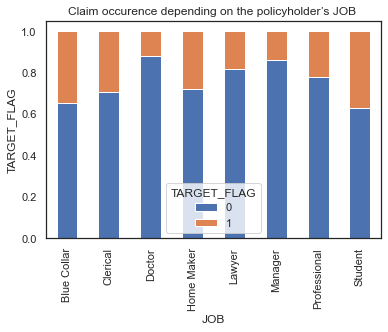

In [32]:
table=pd.crosstab(df_train.JOB,df_train.TARGET_FLAG)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Claim occurence depending on the policyholder’s JOB ')
plt.xlabel('JOB')
plt.ylabel('TARGET_FLAG')


The variable JOB seems to be a good predictor of the TARGET_FLAG

Text(0, 0.5, 'TARGET_FLAG')

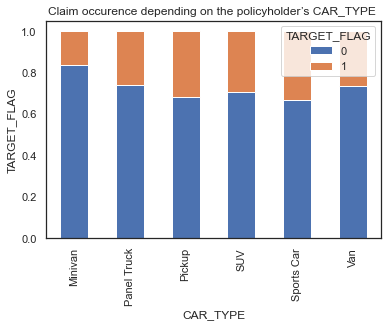

In [33]:
table=pd.crosstab(df_train.CAR_TYPE,df_train.TARGET_FLAG)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Claim occurence depending on the policyholder’s CAR_TYPE ')
plt.xlabel('CAR_TYPE')
plt.ylabel('TARGET_FLAG')


The variable CAR_TYPE  seems to be a good predictor of the TARGET_FLAG

Text(0, 0.5, 'TARGET_FLAG')

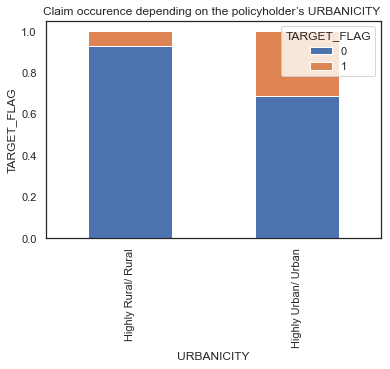

In [34]:
table=pd.crosstab(df_train.URBANICITY,df_train.TARGET_FLAG)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Claim occurence depending on the policyholder’s URBANICITY ')
plt.xlabel('URBANICITY')
plt.ylabel('TARGET_FLAG')


The variable URBANICITY seems to be a good predictor of the TARGET_FLAG

Text(0, 0.5, 'TARGET_FLAG')

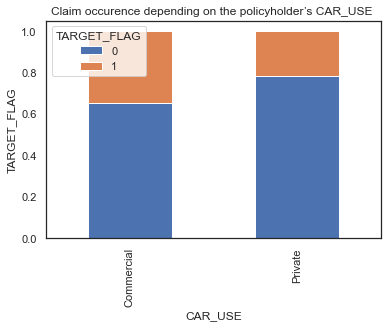

In [35]:
table=pd.crosstab(df_train.CAR_USE,df_train.TARGET_FLAG)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Claim occurence depending on the policyholder’s CAR_USE ')
plt.xlabel('CAR_USE')
plt.ylabel('TARGET_FLAG')


The variable CAR_USE seems to be a good predictor of the TARGET_FLAG

In [36]:
#converting the categorical variables to be used properly in the logit regression
df_train = pd.get_dummies(df_train, prefix='', prefix_sep='', 
                            columns=['JOB','CAR_TYPE','EDUCATION','CAR_USE','URBANICITY'])

In [37]:
test = pd.get_dummies(test, prefix='', prefix_sep='', 
                            columns=['JOB','CAR_TYPE','EDUCATION','CAR_USE','URBANICITY'])

In [38]:
df_train.columns

Index(['INDEX', 'TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'TRAVTIME', 'BLUEBOOK', 'TIF',
       'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE',
       'Blue Collar', 'Clerical', 'Doctor', 'Home Maker', 'Lawyer', 'Manager',
       'Professional', 'Student', 'Minivan', 'Panel Truck', 'Pickup', 'SUV',
       'Sports Car', 'Van', '<High School', 'Bachelors', 'High School',
       'Masters', 'PhD', 'Commercial', 'Private', 'Highly Rural/ Rural',
       'Highly Urban/ Urban'],
      dtype='object')

In [39]:
test.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'TRAVTIME',
       'BLUEBOOK', 'TIF', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED',
       'MVR_PTS', 'CAR_AGE', 'Blue Collar', 'Clerical', 'Doctor', 'Home Maker',
       'Lawyer', 'Manager', 'Professional', 'Student', 'Minivan',
       'Panel Truck', 'Pickup', 'SUV', 'Sports Car', 'Van', '<High School',
       'Bachelors', 'High School', 'Masters', 'PhD', 'Commercial', 'Private',
       'Highly Rural/ Rural', 'Highly Urban/ Urban'],
      dtype='object')

In [40]:
#missing values
df_train.isnull().sum()

INDEX                  0
TARGET_FLAG            0
KIDSDRIV               0
AGE                    0
HOMEKIDS               0
YOJ                    0
INCOME                 0
PARENT1                0
HOME_VAL               0
MSTATUS                0
SEX                    0
TRAVTIME               0
BLUEBOOK               0
TIF                    0
RED_CAR                0
OLDCLAIM               0
CLM_FREQ               0
REVOKED                0
MVR_PTS                0
CAR_AGE                0
Blue Collar            0
Clerical               0
Doctor                 0
Home Maker             0
Lawyer                 0
Manager                0
Professional           0
Student                0
Minivan                0
Panel Truck            0
Pickup                 0
SUV                    0
Sports Car             0
Van                    0
<High School           0
Bachelors              0
High School            0
Masters                0
PhD                    0
Commercial             0


In [41]:
test.isnull().sum()

INDEX                     0
TARGET_FLAG            2141
TARGET_AMT             2141
KIDSDRIV                  0
AGE                       0
HOMEKIDS                  0
YOJ                       0
INCOME                    0
PARENT1                   0
HOME_VAL                  0
MSTATUS                   0
SEX                       0
TRAVTIME                  0
BLUEBOOK                  0
TIF                       0
RED_CAR                   0
OLDCLAIM                  0
CLM_FREQ                  0
REVOKED                   0
MVR_PTS                   0
CAR_AGE                   0
Blue Collar               0
Clerical                  0
Doctor                    0
Home Maker                0
Lawyer                    0
Manager                   0
Professional              0
Student                   0
Minivan                   0
Panel Truck               0
Pickup                    0
SUV                       0
Sports Car                0
Van                       0
<High School        

# III. Prediction of the TARGET_FLAG based on the train dataset

In [42]:
# This vector will be used lately to caculate the Target_Flag of the test dataset as an application of the implemented models
X_result=test.drop(columns = ['TARGET_FLAG',"INDEX","TARGET_AMT"])

## 1. Logistic regression

In [43]:
from sklearn.model_selection import train_test_split

Y=df_train["TARGET_FLAG"]
X=df_train.drop(columns = ['TARGET_FLAG',"INDEX"])

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 15)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logreg = LogisticRegression(max_iter=1000)

logreg.fit(X, Y)

C:\Users\igara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [45]:
y_pred = logreg.predict(x_test)


In [46]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [47]:
# Closeness of the regression line to the observation
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.036014766590588776

r2 indicates the proportion of data points which lie within the line created by the regression equation

We have a very low value of r2 ( the perfect value would be 1). Unfortunately, the logit regression model  did not work well for our data

In [48]:
# Data frame of the difference between the observations and the predictions
pred_obs_diff=pd.DataFrame({"Observations":y_test,"Predictions":y_pred,"Difference":y_test-y_pred})
pred_obs_diff[0:20]

,Observations,Predictions,Difference
7679,0,0,0
673,0,0,0
3011,0,0,0
6130,0,0,0
7931,0,0,0
6628,1,0,1
5577,0,0,0
126,0,0,0
4343,0,0,0
2356,1,0,1


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1410  100]
 [ 307  224]]


Confusion matrix measures the quality of the classification. 

We have 1410+100 correct predictions and 307+224 incorrect predictions.

In [50]:
y_result = logreg.predict(X_result)

In [51]:
print(y_result)

[0 0 0 ... 0 0 0]


In [52]:
test['TARGET_FLAG_logitreg']=y_result

In [53]:
test.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,<High School,Bachelors,High School,Masters,PhD,Commercial,Private,Highly Rural/ Rural,Highly Urban/ Urban,TARGET_FLAG_logitreg
0,3,NaN,NaN,0,48.0,0,11.000000,52.881,0,0.0,...,0,1,0,0,0,0,1,0,1,0
1,9,NaN,NaN,1,40.0,1,11.000000,50.815,1,0.0,...,0,0,1,0,0,0,1,0,1,0
2,10,NaN,NaN,0,44.0,2,12.000000,43.486,1,0.0,...,0,0,1,0,0,1,0,1,0,0
3,18,NaN,NaN,0,35.0,2,10.379091,21.204,1,0.0,...,0,0,1,0,0,0,1,1,0,0
4,21,NaN,NaN,0,59.0,0,12.000000,87.460,0,0.0,...,0,0,1,0,0,0,1,0,1,0


In [54]:
test.groupby("TARGET_FLAG_logitreg").mean()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,Van,<High School,Bachelors,High School,Masters,PhD,Commercial,Private,Highly Rural/ Rural,Highly Urban/ Urban
TARGET_FLAG_logitreg,,,,,,,,,,,,,,,,,,,,,
0,5204.245230,NaN,NaN,0.125701,45.846250,0.603255,10.600148,64.772453,0.079686,168.289971,...,0.081930,0.127946,0.287318,0.248597,0.223906,0.112233,0.324355,0.675645,0.225589,0.774411
1,4881.325905,NaN,NaN,0.345404,40.899721,1.284123,9.281811,39.973235,0.345404,78.401966,...,0.069638,0.233983,0.192201,0.498607,0.058496,0.016713,0.506964,0.493036,0.002786,0.997214


### 2. Random forest classifier

Accuracy ::  0.7961783439490446
Precision ::  0.7090909090909091


[Text(0.5, 12.5, 'predict'), Text(30.5, 0.5, 'true')]

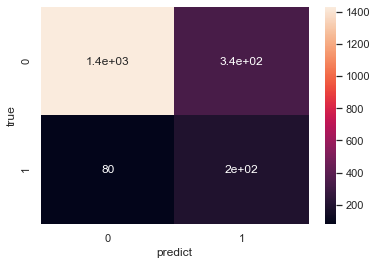

In [55]:
#Using RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=1700,random_state=5)
model.fit(x_train, y_train)
predict = model.predict(x_test)

from sklearn import metrics
print('Accuracy :: ',metrics.accuracy_score(y_test,predict))
print('Precision :: ',metrics.precision_score(y_test,predict))
from sklearn.metrics import accuracy_score,confusion_matrix
conf_matrix = confusion_matrix(predict,y_test)
ax = sns.heatmap(conf_matrix,annot=True)
ax.set(xlabel='predict', ylabel='true')

Accuracy indiquates how accurate the classification is. 

For the random forest model the accuracy is 0.7961783439490446 which is not relatively low as a result.

Precision is the ratio between the True Positives and all the points that are classified as Positives. The precision of the random forest model is 0.7090909090909091.

In [56]:
print(model.predict(X_result))

[0 0 0 ... 0 0 0]


In [57]:
test["TARGET_RandomForest"]=model.predict(X_result)

In [58]:
test.groupby("TARGET_RandomForest").mean()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,<High School,Bachelors,High School,Masters,PhD,Commercial,Private,Highly Rural/ Rural,Highly Urban/ Urban,TARGET_FLAG_logitreg
TARGET_RandomForest,,,,,,,,,,,,,,,,,,,,,
0,5175.435242,NaN,NaN,0.148416,45.790439,0.625903,10.682725,64.883686,0.088938,168.760423,...,0.138410,0.27960,0.250139,0.223457,0.108394,0.326292,0.673708,0.222902,0.777098,0.061145
1,5016.821637,NaN,NaN,0.236842,40.947418,1.198830,8.781906,38.155413,0.309942,71.459162,...,0.184211,0.22807,0.502924,0.052632,0.032164,0.505848,0.494152,0.005848,0.994152,0.728070


In [60]:
#saving the resultats (the predictions of the target variable using the logistic regression model and the random forest model)
#two columns contain the results:TARGET_FLAG_logitreg // TARGET_RandomForest
test.to_csv(path_or_buf= r"/Users/igara/OneDrive/Bureau/auto-insurance-fall-2017/test_auto_result.csv",
                 sep= ",") 